In [1]:
# Use of IPython.display and HTML for using css to format text in Markdown based on
# www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)

<h2><b><u>Case Study: Popular Books - Best Sellers and Highly Rated Titles </u></b></h2>

<h3><b><i>Goal</i></b></h3>
The goal of this Case Study is to practice <b><i>preprocessing and cleaning</i></b> real datasets based on what you've learned in DataCamp's <a href="https://learn.datacamp.com/courses/cleaning-data-in-python">Cleaning Data in Python</a> course. This Case Study will have many Code cells that produce errors. Instead of hiding these errors or modifying the data files to not have them, you will see the errors and see how to solve them. This is part of the data cleaning process, to determine what in the raw data file does not work and learn how to fix it. 


<h3><b><i>Data</i></b></h3>
Two datasets hosted on Kaggle and released under CC0 will be used in this Case Study. The first is the <b><i>Goodreads-books</i></b> dataset provided by Soumik. The <a href = "https://www.kaggle.com/jealousleopard/goodreadsbooks">Goodreads-books</a> dataset was produced using the Goodreads API and underwent additional preprocessing by its creator. The second dataset is the <b><i>Amazon Top 50 Bestselling Books 2009 - 2019</i></b> provided by Sooter Saalu. The <a href = "https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019">Amazon Top 50 Bestselling Books 2009 - 2019</a> dataset was scraped from Amazon and contains a <i>categories</i> column added by the dataset creator. 

Both datsets are in <b><i>csv</i></b> format. The <b><i>Goodreads-books</i></b> dataset will be referred to as <b><i>Goodreads</i></b> and the <b><i>Amazon Top 50 Bestselling Books 2009-2019</i></b> as <b><i>Amazon</i></b> within this Case Study. 

 


  
Sources: 
<ol style = "font-size:8px">
    <li>Soumik. 2020. "Goodreads-books". https://www.kaggle.com/jealousleopard/goodreadsbooks </li>
    <li>Sooter Saalu. 2020. "Amazon Top 50 Bestselling Books 2009-2019". https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019/ </li>

</ol>



<h4><u>Importing libraries</u></h4>

<span class="bltn">Import</span> pandas and matplotlib.pyplot in the Code cell below. 

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

<h4><u>Reading in the Goodreads Data</u></h4>

Read in the <b><i>Goodreads</i></b> data using pandas <b>read_csv</b> method and specifying <b><i>on_bad_lines</i></b> <span class="op">=</span> <span class="str">"warn"</span>. 

In [5]:
# Import the Goodreads data
gdrd_df = pd.read_csv("Data\goodreads_books.csv", sep = ",", on_bad_lines = "warn")

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


The <b><i>on_bad_lines</i></b> parameter is set to <span class="str">warn</span> when the number of row values does not match the number of values in the header row. This allows the csv file to continue to be read into a DataFrame by excluding the non-matching rows. Since there are only four rows that have this problem, excluding them is fine for the purpose of the Case Study. 

The column names, number of non-NaN values, and columnn data type is then displayed using <b>info</b>. Display the <span class="num"> first 2 rows</span>. 

In [6]:
# Display column metadata using gdrd_df.info()

# Display first 2 rows of gdrd_df


<h4><u>Modifying Column Data Types</u></h4>

The output of <b>info</b> shows that most of the columns were read in with the correct data type. Let's change the data type for <span class="num"> 2 </span> columns, <b><i>isbn13 and publication_date</i></b>. Although <b><i>isbn13</i></b> is a unique numeric identifier, no numerical operations will be performed using it, so the data type can be changed to <span class="str">string</span>. The <b><i>publication_date</i></b> column can be changed to <i>datetime</i>. 

In [7]:
# Change the data type of isbn13 to str 
gdrd_df["isbn13"] = gdrd_df["isbn13"].astype("str")

# Check that the isbn13 col. is str (object) 
assert gdrd_df["isbn13"].dtype == "object"


The <b>assert</b> statement ran without errors which means that the data type conversion was succesful. Converting <i>publication_date</i> to <i>datetime</i> will be a little more challenging. There are <span class="num">2 rows</span> of data that have errors in their format which will not allow them to convert to <i>datetime</i>. The row with <i>bookID</i> <span class="num">31373 and 45531</span>. Display these rows to identify the problem. 

In [8]:
print(gdrd_df[gdrd_df["bookID"] == 31373])
print(gdrd_df[gdrd_df["bookID"] == 45531])

      bookID                                              title  \
8177   31373  In Pursuit of the Proper Sinner (Inspector Lyn...   

                authors  average_rating        isbn         isbn13  \
8177  Elizabeth  George             4.1  0553575104  9780553575101   

     language_code    num_pages  ratings_count  text_reviews_count  \
8177           eng          718          10608                 295   

     publication_date     publisher  
8177       11/31/2000  Bantam Books  
       bookID                                       title  \
11094   45531  Montaillou  village occitan de 1294 à 1324   

                                               authors  average_rating  \
11094  Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie            3.96   

             isbn         isbn13 language_code    num_pages  ratings_count  \
11094  2070323285  9782070323289           fre          640             15   

       text_reviews_count publication_date       publisher  
11094            

These two books have days which do not exist for that month. Both June and November only have 30 days, not 31. This will cause the data type conversion to error. These two rows could be removed from <b><i>gdrd_df</i></b> at this point, but let's see how these rows were identified and how to handle this situation. 

When converting to <i>datetime</i> using pandas <b>to_datetime</b>, the argument for <b><i>errors</i></b> is set to <span class="str">coerce</span>. This allows any values with a conversion error to be specified as <b><i>NaT</i></b> <a href = "https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html">(Pandas, 2021)</a>. 

In [9]:
# Change the data type of publication_date to datetime
gdrd_df["publication_date"] = pd.to_datetime(gdrd_df["publication_date"], errors = "coerce")

# Check that publication_date was converted to datetime64[ns]
assert gdrd_df["publication_date"].dtype == "datetime64[ns]"

# Identify the rows in which publication_date was unable to convert 
nat_rows = gdrd_df[gdrd_df["publication_date"].isna() == True]

Checking for <b><i>NaT</i></b> values using <b>isna</b> can identify the rows in which <i>publication_date</i> could not correctly convert. Let's remove these two rows from <b><i>gdrd_df</i></b> using <b>drop</b>. 

In [10]:
# Identify the rows in which publication_date was unable to convert.
# This command will error if ran more than once since the specified indices will already have been dropped. 
gdrd_df.drop(nat_rows.index, axis = 0, inplace = True)

In [11]:
# Check that the rows were dropped.
gdrd_df[gdrd_df["publication_date"].isna() == True]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


<h4><u>Removing Values that Violate Data Constraints</u></h4>

Both the <i>publication_date</i> and <i>isbn13</i> columns have been updated to their correct data types. Next let's check that the <i>isbn</i> column values are <span class="num">10</span> <span class="str">characters</span> in length and that <i>isbn13</i> values are <span class="num">13</span> <span class="str">characters</span> in length. 

In [12]:
# Extract the rows in which isbn is not 10 characters or the isbn13 is not 13 characters 
wrong_length = gdrd_df[(gdrd_df["isbn"].str.len() != 10) | (gdrd_df["isbn13"].str.len() != 13)]

# Print the number of rows that meet this criteria by printing the shape of wrong_length

# Display the first 2 rows of wrong_length


A book can be looked up with either the <i>isbn</i> or <i>isbn13</i> number, however let's go ahead and remove those rows that have one or the other with the incorrect length. Instead of using the <b>drop</b>, ~wrong_length will be used. This is similar to DataCamp's Cleaning Data in Python Chapter 2 "Drop Inconsistent Categories" example. However, instead of categories such as "B-", "Z+", etc., the boolean values True and False are used. 

In [13]:
# Print the shape of gdrd_df before removing the rows 
print(gdrd_df.shape)

# Boolean results for if the rows in wrong_length are in the gdrd_df
wrong_rows = gdrd_df.isin(wrong_length)

# Create subset of gdrd_df that contains all rows except wrong rows. 
# This assigns NaN values to the wrong_rows 
gdrd_df = gdrd_df[~wrong_rows]

# Drop all rows that contain NaN values 
gdrd_df.dropna(axis = 0, inplace = True)

# Print the shape of gdrd_df after removing the rows 
gdrd_df.shape

(11121, 12)


(11095, 12)

<h4><u>Creating Consistent Values</u></h4>

The next pre-processing step is to convert the <i>title</i> and <i>authors</i> column to <span class="str">lower case strings</span>. This is done to ensure consistency in punctuation of those columns values. 

In [14]:
# Convert the title column to lower case 
gdrd_df["title"] = gdrd_df["title"].str.lower()

# Convert the authors column to lower case 
gdrd_df["authors"] = gdrd_df["authors"].str.lower()

# Check the first 5 rows of gdrd_df to ensure it is lower case


<h4><u>Extracting Duplicates</u></h4>

Next let's check for duplicate books. The first thing to check is if any of the rows contain the same data as any other row. This can be done using the <b>duplicated</b> function similar to DataCamp's Chapter 1. 

In [15]:
# Check if any row is contains the exact values of any other row 
dplct_rows = gdrd_df.duplicated()

# Print the shape of gdrd_df[dplct_rows] to see if the number of rows is more than 0. If it is there are duplicates.
gdrd_df[dplct_rows].shape

(0, 12)

No row is an exact duplicate of any other row in <b><i>gdrd_df</i></b>. For this Case Study, it is also of interest to see which <i>titles</i> are duplicates of each other. This can be done by using <b>duplicated</b> with the <i>title</i> column. 

In [16]:
# Get titles that are duplicates 
dplct_titles = gdrd_df.duplicated(subset = ["title"], keep = False)

# Store duplicate titles view 
title_dplct = gdrd_df[dplct_titles]

# Print the number of rows that contain duplicated titles
print(title_dplct.shape[0])

# Print the value counts of the duplicate titles 
title_dplct["title"].value_counts()


1323


the iliad                                  9
the brothers karamazov                     9
anna karenina                              8
'salem's lot                               8
the odyssey                                8
                                          ..
beauty                                     2
speaker for the dead (ender's saga  #2)    2
fear and loathing in las vegas             2
pygmalion                                  2
la tía julia y el escribidor               2
Name: title, Length: 511, dtype: int64

There are many different ways in which duplicate <i>title</i> values could be processed to keep. For simplicity, the <span class="str">first</span> occurence of the duplicate <i>title</i> will be kept in the <b><i>gdrd_df</i></b> DataFrame and all others will be dropped. 

In [17]:
# Drop duplicate titles from gdrd_df. Reset the data frames index to start at 0. 
gdrd_df.drop_duplicates(subset = ["title"], keep = "first", inplace = True, ignore_index = True)

# Print the shape of gdrd_df after dropping duplicates
gdrd_df.shape

(10283, 12)

<h4><u>Creating a Categorical Column</u></h4>

The <b><i>gdrd_df</i></b> now has rows with duplicate <i>title</i> values removed. Let's add a user defined column representing the <i>average_rating</i> of the book as a <b><i>categorical</i></b> value. A <span class="str"> low </span> ranking will represent values <span class="num">[0, < 2]</span>, a <span class="str">medium</span> rating will represent values <span class="num">[2, < 4]</span>, and a <span class="str">high</span> rating will represent values <span class="num">[4, 5]</span>. 

In [18]:
# Create a list to hold the names for the categories
cat_names = ["low", "medium", "high"]

# Create a list containing the range of the categories. Set the last value slightly larger than the max rating of 5 
val_range = [0, 2, 4, 5.01]

# Create the categorical column rating_ctgry. 
gdrd_df["rating_ctgry"] = pd.cut(gdrd_df["average_rating"], bins = val_range, labels = cat_names, right = False)

# Check that rating_ctgry is categorical 
assert gdrd_df["rating_ctgry"].dtype == "category"

In [19]:
# Display the first 10 rows with only the average_rating and cat_rate columns 
gdrd_df[["average_rating","rating_ctgry"]].head(10)

,average_rating,rating_ctgry
0,4.57,high
1,4.49,high
2,4.42,high
3,4.56,high
4,4.78,high
5,3.74,medium
6,4.73,high
7,4.38,high
8,4.38,high
9,4.22,high


Now <b><i>gdrd_df</i></b> has a <i>category</i> column <i>rating_ctgry</i> that places the <i>average_rating</i> value into the correct category. 

<h4><u>Exploring the Data</u></h4>

The <b><i>Goodreads-books</i></b> dataset stored in <b><i>gdrd_df</i></b> is now ready to be used to gain insights into the data. The Code cells below will show some examples of how <b><i>gdrd_df</i></b> can be used. 

<h4><u>Example 1: Selecting by Date</u></h4>

Return the <i>title</i> and <i>publication_date</i> for all rows in <b><i>gdrd_df</i></b> in which a book was published from <span class="num">2009 to 2011</span>. There are many different ways this could be done. The Code Cell below only shows one of them. 

In [20]:
# Create a list of date ranges between 2009 - 2011. Each item in the list is in MM/DD/YYY format
year_range = pd.date_range(start = "2009", end = "12/31/2011")

# Display the title and publication date of the rows in which the publication date occurred between [2009, 2011]
gdrd_df[gdrd_df["publication_date"].isin(year_range)].loc[:,["title", "publication_date"]]

,title,publication_date
126,sand and foam,2011-06-14
145,the phantom tollbooth: a children's play in tw...,2011-01-12
276,the egypt game,2009-07-07
301,the good earth (house of earth #1),2009-03-04
470,el último lector,2009-07-15
...,...,...
9743,tai-pan (asian saga #2),2009-09-01
9875,harry potter and the philosopher's stone (harr...,2010-07-01
9964,tell no one,2009-08-25
10128,einstein's monsters,2011-01-05


<h4><u>Example 2: Categorical Counts</u></h4>

Print the number of books that are in each category for the <i>rating_ctgry</i> column. 

In [21]:
# Print the counts of the books in each category for rating_ctgry
print(gdrd_df["rating_ctgry"].value_counts())

medium    5663
high      4592
low         28
Name: rating_ctgry, dtype: int64


<h4><u>Example 3: Plotting the Average Rating</u></h4>

Create a view of <b><i>gdrd_df</i></b> containing the top 100 rated books. Create a scatterplot showing the relationship between <i>average_rating</i> and <i>ratings_count</i> for the top 100. 

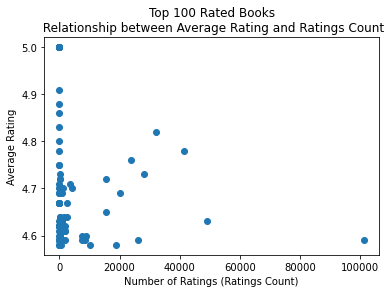

In [22]:
# Extract the top 100 rated books 
gdrd_top_100 = gdrd_df.sort_values(by = "average_rating", axis = 0, ascending = False)[:][0:100]

# Create scatterplot that shows the relationship between average_rating and ratings_count
plt.title("Top 100 Rated Books\n Relationship between Average Rating and Ratings Count")
plt.xlabel("Number of Ratings (Ratings Count)")
plt.ylabel("Average Rating")
plt.scatter(gdrd_top_100["ratings_count"], gdrd_top_100["average_rating"])
plt.show()


The scatterplot above shows that most of the highly rated books from the <b><i>Goodreads-books</i></b> dataset have a low number of users rating them. Most books have less than <span class="num">20,000</span> ratings. 

<h4><u>Example 4: Highly Rated Books with more than 20,000 Ratings</u></h4>

Display the <i>title, average_rating, and the number of ratings</i> from <b><i>gdrd_top_100</i></b> with a <i>ratings_count</i> <span class="num">greater than 20,000</span> 


In [23]:
gdrd_top_100[gdrd_top_100["ratings_count"] > 20000].loc[:,["title", "average_rating", "ratings_count"]]

,title,average_rating,ratings_count
6059,the complete calvin and hobbes,4.82,32213.0
4,harry potter boxed set books 1-5 (harry potte...,4.78,41428.0
6061,it's a magical world (calvin and hobbes #11),4.76,23875.0
6,harry potter collection (harry potter #1-6),4.73,28242.0
6063,the days are just packed,4.69,20308.0
6060,the calvin and hobbes tenth anniversary book,4.63,49122.0
67,the lord of the rings: the art of the fellowsh...,4.59,26153.0
20,j.r.r. tolkien 4-book boxed set: the hobbit an...,4.59,101233.0


<h3 class="yt">Your Turns</h3>

In the <span class="yt"> Your Turns</span> below, you will work with the <b><i>Amazon Top 50 Bestselling Books 2009 - 2019</i></b> csv file. You will pre-process (clean) this dataset, examine the dataset, and use it with the <b><i>Goodreads - books</i></b> dataset from above. 

<h3 class="yt">Your Turn: 1</h3>

Read in the <b><i>Amazon Top 50 Bestselling Books 2009 - 2019</i></b> dataset, <span class="str">amazon_bestsellers_with_categories.csv</span> , into a DataFrame called amazon_df. Display <b>info()</b> about the DataFrame and the <span class="num">first 5 rows</span>.

<h3 class="yt">Your Turn: 2</h3>

Convert the <b><i>amazon_df</i></b> <i>Year</i> column to datetime data type. <b><i>Hint 1:</i></b> the <b><i>format</i></b> of the values in <i>Year</i> means only the %Y needs to be specified. <b><i>Hint 2:</i></b>The year can be extracted from a pandas datetime value by specifying <b><i>.dt.year</i></b> for the <i>Year</i> column after converting to datetime. The <i>Year</i> column should only contain values such as <span class="num">2016, 2017, etc.</span>. It should not contain values such as <span class="num">2016-01-01, 2017-01-01, etc.</span>. 

Verify that the conversion was correct using <span class="bltn">assert</span>. <Span class="bltn">Print</span> the first <span class="num">5 values</span> of the <i>Year</i> column. 


<h3 class="yt">Your Turn: 3</h3>

Update the <i>Name</i> and <i>Author</i> columns in <b><i>amazon_df</i></b> to <span class="str">lowercase</span> values. 

Check that both columns successfully updated to <span class="str">lowercase</span> by using <span class="bltn">assert</span> statements. <b><i>Hint:</i></b> use the <span class="bltn"> assert</span> statement  with <b><i>.str.islower().all()</i></b> and check that the value it returns is <span class="bltn">True</span>. 

<h3 class="yt">Your Turn: 4</h3>

Remove duplicate <i>Name</i> values from <b><i>amazon_df</i></b>. Specify to <b><i>keep</i></b> the <span class="str">first</span> value. Reset the index of <b><i>amazon_df</i></b> by specifying <b><i>ignore_index</i></b> as <span class="bltn">True</span>. 

<h3 class="yt">Your Turn: 5</h3>

Sort <b><i>amazon_df</i></b> by <i>User Rating</i> in <b><i>descending</i></b> order. <span class="bltn">Print</span> the <span class="num">first 10 rows</span> of <b><i>amazon_df</i></b>. 

<h3 class="yt">Your Turn: 6</h3>

Identify the highest <i>User Rating</i> for all books in <b><i>amazon_df</i></b>. <span class="bltn">Print</span> the highest <i>User Rating</i> and the count of the number of books equal to this value. 

<h3 class="yt">Your Turn: 7</h3>

<b><i>Inner Join</i></b> <b><i>amazon_df</i></b> on <b><i>gdrd_df</i></b> and store the result in a new DataFrame. <span class="bltn">Print</span> the <b>shape</b> of the new DataFrame. <span class="bltn">Print</span> the <span class="num">first 5 rows</span>. 

<h3 class="yt">Your Turn: 8 - OPTIONAL</h3>

You will need to have the the <b><i>recordlinkage</i></b> package installed for this <span class="yt">Your Turn</span>. 

The Code cells below are based on DataCamp's Cleaning Data in Python Chapter 4 and the <a href = "https://recordlinkage.readthedocs.io/en/latest/index.html"> Python Record Linkage Toolkit Documentation</a>. 

<span class="yt">Your Turn: 8</span> attempts to match books between <b><i>amazon_df and gdrd_df</i></b> using the <i>Name and title</i> columns with the <b><i>Record Linkage</i></b> library by comparing the similarity between values in both DataFrames using the levenshtein method which is Record Linkage's default.  

The Code cells below are complete and use the <b><i>amazon_df</i></b> you created in the previous <span class="yt">Your Turns</span>. You will need to run each Code cell, then answer the following questions in the Markdown Cell directly after this one. 
<ol>
    <li>How does the shape between the <b><i>inner join</i></b> in <span class="yt">Your Turn: 7's </span> result differ from the shape of the matching records in the <b><i>matching_books_df</i></b>? </li><br>
    <li>Pick a row in which <i>Name</i> and <i>title</i> were not an exact match in <b><i>matching_books_df</i></b> (output of last Code cell). Which words differed between the <i>Name</i> and <i>title</i> values?</li><br>
    <li>Is it useful to be able to match values that may not be an exact match? How could you use this in your future assignments, research, or work? </li>
</ol>

<b><i>Your Turn 8: Answers</i></b>

<b>1)</b>

<b>2)</b>

<b>3)</b>


In [25]:
# Import recordlinkage
import recordlinkage

# Create a copy of gdrd_df and reset its index. Either the index needs to be set on the originals or a copy made with reset 
# index for this to work 
gdrd_df_cpy = gdrd_df.copy().reset_index(drop = True)
amazon_df_cpy = amazon_df.copy().reset_index(drop = True)

# Create Index object 
indexer = recordlinkage.Index()

# Purposefully create a full index for this example. This matches every row to every other row between the DataFrames. 
# Ignore the warning for this example.  
indexer.full()

# Create an index of the pairs from amazon_df_cpy and gdrd_df_cpy
book_pairs = indexer.index(amazon_df_cpy, gdrd_df_cpy)

# Create a Compare object to compare records (rows)
compare_cl = recordlinkage.Compare()

# Specify how to compare the Name and title values. Set a lower threshold to see how the matches look. 
compare_cl.string("Name", "title", threshold = .70, label="Book_Titles")


# Compute the comparisons. This may take a little while. 
book_matches = compare_cl.compute(book_pairs, amazon_df_cpy, gdrd_df_cpy)

NameError: name 'amazon_df' is not defined

In [ ]:
# Get matches in which Book_Titles is == 1. Book_Titles is the only comparison. 
matching_books = book_matches[book_matches.sum(axis = 1) == 1]

# See how many matches are returned. 
matching_books.shape


In [ ]:
# Get the index for each match to use on their respective DataFrame 
matches_amazon = matching_books.index.get_level_values(0)
matches_gdrds = matching_books.index.get_level_values(1)

# Create a new view of both DataFrames. Reset the index for both. Drop the previous index.
amazon_matches = amazon_df_cpy.iloc[matches_amazon].reset_index(drop = True)
gdrd_matches = gdrd_df_cpy.iloc[matches_gdrds].reset_index(drop = True)

In [ ]:
# Create a new DataFrame with the matches. 
matching_books_df = pd.concat([amazon_matches, gdrd_matches], axis = 1)

# Print the shape 
print(matching_books_df.shape)
# Display the first 5 rows
matching_books_df.head()

In [ ]:
# Display rows in matching_books_df in which the Name column does not match the title column exactly
matching_books_df[matching_books_df["Name"] != matching_books_df["title"]]